In [624]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from imblearn.over_sampling import SMOTE

In [625]:
path_test_demo='testdemographics.csv.xls'
path_test_perf='testperf.csv.xls'
path_trainperf='trainperf.csv.xls'
path_train_demo='traindemographics.csv.xls'
path_test_prevloans='testprevloans.csv'
path_train_prevloans='trainprevloans.csv'
submission_sample='SampleSubmission.csv.xls'

#### Loading the demographic data

In [626]:
demo_data=pd.read_csv(path_train_demo)

In [627]:
demo_data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary


Description of demographic data:
- customerid (Primary key used to merge to other data)
- birthdate (date of birth of the customer)
- bank_account_type (type of primary bank account)
- longitude_gps
- latitude_gps
- bank_name_clients (name of the bank)
- bank_branch_clients (location of the branch - not compulsory - so missing in a lot of the cases)
- employment_status_clients (type of employment that customer has)
- level_of_education_clients (highest level of education)

### Cleaning the demographic data

checking for duplicates in the data

In [628]:
demo_data[demo_data.duplicated()]

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
776,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
1015,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN
1090,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
1188,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,NaN,Permanent,NaN
1480,8a858fe05d421ff4015d4c87d2a21ceb,1983-01-20 00:00:00.000000,Savings,8.526960,12.023015,Skye Bank,NaN,Permanent,NaN
1928,8a858e625c8d993a015c938f829f77ee,1988-12-20 00:00:00.000000,Savings,5.768333,5.561992,First Bank,NaN,Permanent,NaN
1996,8a858ec65cc6352b015cc64525ea0763,1985-01-30 00:00:00.000000,Savings,3.845728,7.411737,GT Bank,NaN,Permanent,NaN
4126,8a858f1e5baffcc9015bb02b505f180d,1983-04-06 00:00:00.000000,Savings,6.969350,4.818535,GT Bank,NaN,Permanent,NaN


As we can see there are alot of duplicated rows so we would have to remove them

In [629]:
demo_data=demo_data.drop_duplicates(subset=None,keep='first',inplace=False,ignore_index=False)

we want to check the percentage of missing values in the data

In [630]:
print(demo_data.isnull().sum()/demo_data.shape[0]*100)

customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
bank_branch_clients           98.823258
employment_status_clients     14.951546
level_of_education_clients    86.479003
dtype: float64


As we can see there are alot of missing values in bank_branch client.
while level of education might be an important feature, not removing it might cause bias so first we want to remove it togther with bank branch


In [631]:
demo_data.drop(['bank_branch_clients'],axis=1,inplace=True)

/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/2874678738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data.drop(['bank_branch_clients'],axis=1,inplace=True)


In [632]:
demo_data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent,NaN
...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,Permanent,Primary


In [633]:
demo_data.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
employment_status_clients      648
level_of_education_clients    3748
dtype: int64

### Cleaning the demographic test data

In [634]:
demo_test_data=pd.read_csv(path_test_demo)

In [635]:
demo_test_data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN
...,...,...,...,...,...,...,...,...,...
1482,8a858fc25bafabdc015bb47fda0323e5,1976-04-13 00:00:00.000000,Savings,3.481190,6.442728,GT Bank,NaN,Permanent,NaN
1483,8a858e245c214660015c3397e4db389a,1990-10-24 00:00:00.000000,Savings,4.738209,8.179723,GT Bank,NaN,Permanent,NaN
1484,8a858e8b5bc9e7e6015bcd7374077f0c,1988-06-12 00:00:00.000000,Savings,3.424825,6.455802,First Bank,NaN,Permanent,NaN
1485,8a858f2e5c699f3a015c77aa22ed7f23,1974-03-23 00:00:00.000000,Savings,3.318851,7.113212,FCMB,NaN,Permanent,NaN


In [636]:
demo_test_data[demo_test_data.duplicated()]

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
502,8a8588b75438f49901544510041e0951,1980-01-16 00:00:00.000000,Other,3.342808,6.542411,Zenith Bank,NaN,Permanent,Graduate
810,8a858e885b68546c015b7238f22027ba,1975-06-18 00:00:00.000000,Savings,3.353123,6.587837,First Bank,NaN,Permanent,NaN
1285,8a858f2e5c699f3a015c6e10b65607c9,1978-06-20 00:00:00.000000,Savings,3.325513,6.500937,GT Bank,NaN,Permanent,NaN


In [637]:
demo_data_test=demo_test_data.drop_duplicates(subset=None,keep='first',inplace=False,ignore_index=False)

In [638]:
print(demo_test_data.isnull().sum()/demo_test_data.shape[0]*100)

customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
bank_branch_clients           99.058507
employment_status_clients     14.593141
level_of_education_clients    85.877606
dtype: float64


In [639]:
demo_data_test.drop(['bank_branch_clients'],axis=1,inplace=True)

/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/1345163341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_test.drop(['bank_branch_clients'],axis=1,inplace=True)


In [640]:
demo_data_test

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,Self-Employed,NaN
...,...,...,...,...,...,...,...,...
1482,8a858fc25bafabdc015bb47fda0323e5,1976-04-13 00:00:00.000000,Savings,3.481190,6.442728,GT Bank,Permanent,NaN
1483,8a858e245c214660015c3397e4db389a,1990-10-24 00:00:00.000000,Savings,4.738209,8.179723,GT Bank,Permanent,NaN
1484,8a858e8b5bc9e7e6015bcd7374077f0c,1988-06-12 00:00:00.000000,Savings,3.424825,6.455802,First Bank,Permanent,NaN
1485,8a858f2e5c699f3a015c77aa22ed7f23,1974-03-23 00:00:00.000000,Savings,3.318851,7.113212,FCMB,Permanent,NaN


### checking for cardinality

In [641]:
demo_data.nunique()

customerid                    4334
birthdate                     3297
bank_account_type                3
longitude_gps                 4103
latitude_gps                  4313
bank_name_clients               18
employment_status_clients        6
level_of_education_clients       4
dtype: int64

### Loading previous loans data

In [642]:
prev_loans=pd.read_csv(path_train_prevloans)
prev_loans_test=pd.read_csv(path_test_prevloans)

In [643]:
prev_loans

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


Previous loans data (trainprevloans.csv) : This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.
Description of data:
- customerid (Primary key used to merge to other data)
- systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
- loannumber (The number of the loan that you have to predict)
- approveddate (Date that loan was approved)
- creationdate (Date that loan application was created)
- loanamount (Date that loan application was created)
- totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees) termdays (Term of loan)
- closeddate (Date that the loan was settled)
- referredby (customerId of the customer that referred this person - is missing, then not refrerred)
- firstduedate (Date of first payment due in cases where the term is longer than 30 days. So in the case where the term is 60+ days - then there are multiple monthly payments due - and this dates reflects the date of the first payment)
- firstrepaiddate (Actual date that he/she paid the first payment as defined above)

### Cleaning the previous loan train data

we want to check the percentage of missing data in this data set

In [644]:
print(prev_loans.isnull().sum()/prev_loans.shape[0]*100)

customerid          0.000000
systemloanid        0.000000
loannumber          0.000000
approveddate        0.000000
creationdate        0.000000
loanamount          0.000000
totaldue            0.000000
termdays            0.000000
closeddate          0.000000
referredby         94.357367
firstduedate        0.000000
firstrepaiddate     0.000000
dtype: float64


checking for duplicates

In [645]:
prev_loans[prev_loans.duplicated()]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate


there are no duplicated data here so we move on

as we can see referredby has alot of missing data so we have to remove it

In [646]:
prev_loans.drop(['referredby'],inplace=True,axis=1)

In [647]:
prev_loans

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


### Cleaning the previous loan test data

In [648]:
prev_loans_test

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32.000000,2017-04-09 22:04:10.000000,10000.0,13000.0,30,2017-05-02 22:27:03.000000,8a858e4f5929c3df0159420645f46f55,2017-05-09 00:00:00.000000,2017-05-02 22:11:54.000000
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17.000000,2017-04-15 22:33:05.000000,10000.0,11500.0,15,2017-04-25 19:32:42.000000,NaN,2017-05-02 00:00:00.000000,2017-04-25 19:17:33.000000
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28.000000,2017-06-26 14:45:20.000000,10000.0,13000.0,30,2017-07-13 13:12:43.000000,NaN,2017-07-26 00:00:00.000000,2017-07-13 13:02:34.000000
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10.000000,2017-05-03 05:56:04.000000,10000.0,13000.0,30,2017-06-01 22:00:17.000000,NaN,2017-06-02 00:00:00.000000,2017-06-01 21:50:07.000000


In [649]:
print(prev_loans_test.isnull().sum()/prev_loans_test.shape[0]*100)

customerid          0.000000
systemloanid        0.000000
loannumber          0.000000
approveddate        0.000000
creationdate        0.000000
loanamount          0.000000
totaldue            0.000000
termdays            0.000000
closeddate          0.000000
referredby         94.498053
firstduedate        0.000000
firstrepaiddate     0.000000
dtype: float64


In [650]:
prev_loans_test[prev_loans_test.duplicated()]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate


In [651]:
prev_loans_test.drop(['referredby'],inplace=True,axis=1)

In [652]:
prev_loans_test

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000
...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32.000000,2017-04-09 22:04:10.000000,10000.0,13000.0,30,2017-05-02 22:27:03.000000,2017-05-09 00:00:00.000000,2017-05-02 22:11:54.000000
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17.000000,2017-04-15 22:33:05.000000,10000.0,11500.0,15,2017-04-25 19:32:42.000000,2017-05-02 00:00:00.000000,2017-04-25 19:17:33.000000
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28.000000,2017-06-26 14:45:20.000000,10000.0,13000.0,30,2017-07-13 13:12:43.000000,2017-07-26 00:00:00.000000,2017-07-13 13:02:34.000000
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10.000000,2017-05-03 05:56:04.000000,10000.0,13000.0,30,2017-06-01 22:00:17.000000,2017-06-02 00:00:00.000000,2017-06-01 21:50:07.000000


### Loading performance train loans

In [653]:
performance_loan=pd.read_csv(path_trainperf)
performance_loan_test=pd.read_csv(path_test_perf)

In [654]:
performance_loan

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good
...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad


checking for duplicates

In [655]:
performance_loan.loc[performance_loan.duplicated()]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag


there are no duplicates

checking for missing values

In [656]:
print(performance_loan.isnull().sum()/performance_loan.shape[0]*100)

customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
approveddate      0.000000
creationdate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
referredby       86.561355
good_bad_flag     0.000000
dtype: float64


alot of reffered to missing values

In [657]:
performance_loan.drop(['referredby'],axis=1, inplace=True)

In [658]:
performance_loan

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good
...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,Bad


### cleaning performance test loans

In [659]:
performance_loan_test.loc[performance_loan_test.duplicated()]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby


In [660]:
print(performance_loan_test.isnull().sum()/performance_loan_test.shape[0]*100)

customerid       0.000000
systemloanid     0.000000
loannumber       0.000000
approveddate     0.000000
creationdate     0.000000
loanamount       0.000000
totaldue         0.000000
termdays         0.000000
referredby      87.310345
dtype: float64


In [661]:
performance_loan_test.drop(['referredby'],axis=1, inplace=True)

In [662]:
performance_loan_test

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30
...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000,11500.0,15
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000,13000.0,30
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000,48000.0,60
1448,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000,68100.0,90


### merging the data sets (performance,previous and demographic loan data set)

the primary key in this case is the customer id so we will use that to merge the data sets together

In [663]:
prev_loans.nunique()

customerid          4359
systemloanid       18183
loannumber            26
approveddate       18172
creationdate       18173
loanamount            16
totaldue              97
termdays               4
closeddate         17955
firstduedate         363
firstrepaiddate    18011
dtype: int64

In [664]:
performance_loan.nunique()

customerid       4368
systemloanid     4368
loannumber         23
approveddate     4362
creationdate     4364
loanamount         10
totaldue           47
termdays            4
good_bad_flag       2
dtype: int64

In [665]:
data=prev_loans.merge(performance_loan,how='left',on=['customerid'],suffixes=['_previous','_performance'])

In [666]:
data=data.merge(demo_data,how='left',on=['customerid'])

In [667]:
data[data.isnull()]

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,totaldue_performance,termdays_performance,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [668]:
data.isna().sum()

customerid                        0
systemloanid_previous             0
loannumber_previous               0
approveddate_previous             0
creationdate_previous             0
loanamount_previous               0
totaldue_previous                 0
termdays_previous                 0
closeddate                        0
firstduedate                      0
firstrepaiddate                   0
systemloanid_performance          0
loannumber_performance            0
approveddate_performance          0
creationdate_performance          0
loanamount_performance            0
totaldue_performance              0
termdays_performance              0
good_bad_flag                     0
birthdate                      4510
bank_account_type              4510
longitude_gps                  4510
latitude_gps                   4510
bank_name_clients              4510
employment_status_clients      5873
level_of_education_clients    14719
dtype: int64

In [669]:
df=data.dropna(axis=0)

In [670]:
data

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,totaldue_performance,termdays_performance,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,...,22250.0,15,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,Permanent,NaN
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,...,11500.0,15,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,Permanent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,2016-05-16 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,2016-12-19 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,2016-07-12 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,2016-09-26 00:00:00.000000,...,13000.0,30,Bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from what we see, there are alot of primary key features that do not exist in both demo data, performance and previous data and as such they will respond as missibg values. we will decide what to do with them later on

In [671]:
data[data.customerid=="8aaae7a74400b28201441c8b62514150"]

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,totaldue_performance,termdays_performance,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients


In [672]:
data[data.isnull()]

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,totaldue_performance,termdays_performance,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [673]:
data.notnull().shape

(18183, 26)

In [674]:
data[data['birthdate'].isnull()]

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,totaldue_performance,termdays_performance,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
7,8a8589f35451855401546b0738c42524,301912443,6,2017-05-18 09:42:18.000000,2017-05-18 08:41:12.000000,20000.0,24500.0,30,2017-06-19 10:10:35.000000,2017-06-19 00:00:00.000000,...,39000.0,60,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,8a858ee55830c4b90158337542ab18a1,301796623,3,2017-01-19 10:52:42.000000,2017-01-19 09:52:35.000000,10000.0,13000.0,30,2017-03-25 02:35:37.000000,2017-02-20 00:00:00.000000,...,13000.0,30,Bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,8a858f3d5add42e2015ae0ca6cb66b83,301954121,7,2017-06-28 05:14:32.000000,2017-06-28 04:14:26.000000,30000.0,34500.0,30,2017-07-26 15:32:00.000000,2017-07-28 00:00:00.000000,...,34500.0,30,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,8a858f3d5add42e2015ae0ca6cb66b83,301919843,6,2017-05-27 18:30:38.000000,2017-05-27 17:30:25.000000,20000.0,24500.0,30,2017-06-24 08:54:30.000000,2017-06-26 00:00:00.000000,...,34500.0,30,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,8a858f555cc65d60015cc72de106320c,301945632,1,2017-06-20 21:40:20.000000,2017-06-20 20:39:12.000000,10000.0,11500.0,15,2017-07-03 21:59:19.000000,2017-07-06 00:00:00.000000,...,13000.0,30,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18167,8a858fbd59acee6a0159adcc397f059a,301855470,4,2017-04-04 22:36:08.000000,2017-04-04 21:36:02.000000,20000.0,21900.0,15,2017-04-12 17:25:57.000000,2017-04-19 00:00:00.000000,...,44000.0,30,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18168,8a858fcd56b9f22c0156c5b280650d11,301751864,3,2016-10-30 10:48:28.000000,2016-10-30 09:48:18.000000,20000.0,24500.0,30,2016-11-28 14:47:37.000000,2016-11-30 00:00:00.000000,...,33000.0,30,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18169,8a858fcd56b9f22c0156c5b280650d11,301878599,9,2017-04-24 13:11:28.000000,2017-04-24 12:11:20.000000,30000.0,34100.0,30,2017-05-23 12:46:27.000000,2017-05-24 00:00:00.000000,...,33000.0,30,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18170,8a858fcd56b9f22c0156c5b280650d11,301695859,1,2016-08-26 08:14:14.000000,2016-08-26 07:13:58.000000,10000.0,13000.0,30,2016-09-20 00:07:34.000000,2016-09-26 00:00:00.000000,...,33000.0,30,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for ouliers in the data

In [675]:
data.describe()

,systemloanid_previous,loannumber_previous,loanamount_previous,totaldue_previous,termdays_previous,systemloanid_performance,loannumber_performance,loanamount_performance,totaldue_performance,termdays_performance,longitude_gps,latitude_gps
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000,13673.000000,13673.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790,3.019804e+08,8.378320,25663.531870,29795.094627,33.344333,4.478997,7.290004
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556,1.343207e+04,4.283426,12647.370172,13814.433300,14.703428,8.645320,3.437288
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000,3.019681e+08,5.000000,10000.000000,13000.000000,30.000000,3.354724,6.471885
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000,3.019793e+08,8.000000,30000.000000,33000.000000,30.000000,3.573519,6.617599
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000,3.019930e+08,11.000000,40000.000000,44000.000000,30.000000,6.355602,7.421333
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


Text(0, 0.5, 'termdays_previous')

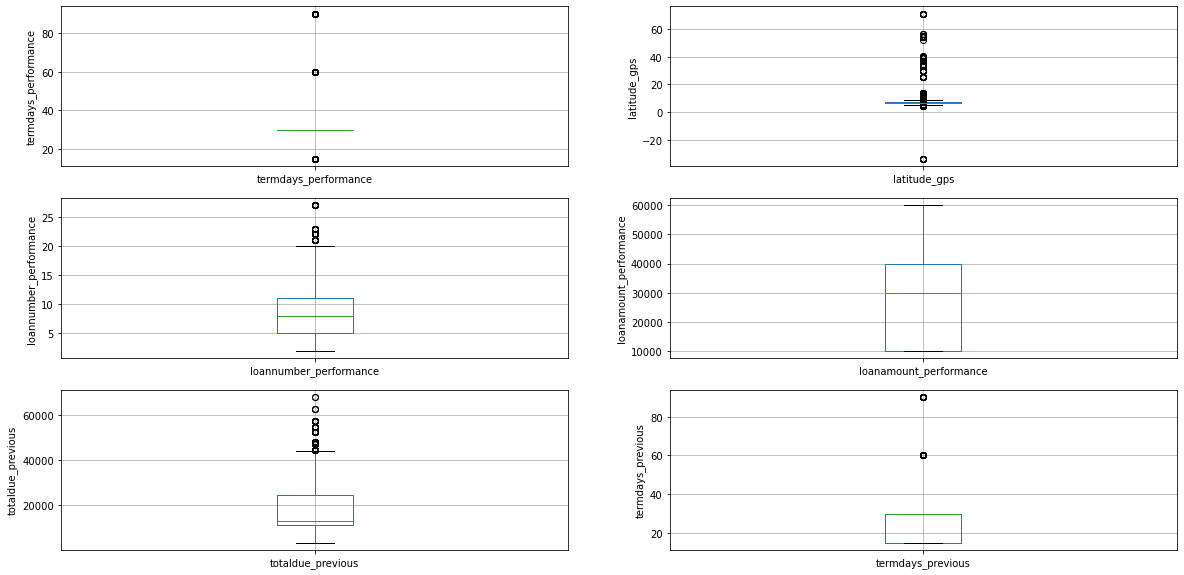

In [676]:
plt.figure(figsize=[20,10])
plt.subplot(3,2,1)
fig=data.boxplot(column='termdays_performance')
fig.set_title('')
fig.set_ylabel('termdays_performance')

plt.subplot(3,2,2)
fig=data.boxplot(column='latitude_gps')
fig.set_title('')
fig.set_ylabel('latitude_gps')

plt.subplot(3,2,3)
fig=data.boxplot(column='loannumber_performance')
fig.set_title('')
fig.set_ylabel('loannumber_performance')

plt.subplot(3,2,4)
fig=data.boxplot(column='loanamount_performance')
fig.set_title('')
fig.set_ylabel('loanamount_performance')

plt.subplot(3,2,5)
fig=data.boxplot(column='totaldue_previous')
fig.set_title('')
fig.set_ylabel('totaldue_previous')

plt.subplot(3,2,6)
fig=data.boxplot(column='termdays_previous')
fig.set_title('')
fig.set_ylabel('termdays_previous')

### Feature engineering

In [677]:
data

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,totaldue_performance,termdays_performance,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,...,22250.0,15,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,Permanent,NaN
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,...,11500.0,15,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,Permanent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,2016-05-16 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,2016-12-19 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,2016-07-12 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,2016-09-26 00:00:00.000000,...,13000.0,30,Bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [678]:
data.isnull().sum()

customerid                        0
systemloanid_previous             0
loannumber_previous               0
approveddate_previous             0
creationdate_previous             0
loanamount_previous               0
totaldue_previous                 0
termdays_previous                 0
closeddate                        0
firstduedate                      0
firstrepaiddate                   0
systemloanid_performance          0
loannumber_performance            0
approveddate_performance          0
creationdate_performance          0
loanamount_performance            0
totaldue_performance              0
termdays_performance              0
good_bad_flag                     0
birthdate                      4510
bank_account_type              4510
longitude_gps                  4510
latitude_gps                   4510
bank_name_clients              4510
employment_status_clients      5873
level_of_education_clients    14719
dtype: int64

seperating the categorical from the numerical variable

In [679]:
categorical_demo=[var for var in demo_data.columns if data[var].dtypes=='O']

In [680]:
categorical_demo

['customerid',
 'birthdate',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients']

In [681]:
categorical=[var for var in data.columns if data[var].dtypes=='O']

In [682]:
categorical

['customerid',
 'approveddate_previous',
 'creationdate_previous',
 'closeddate',
 'firstduedate',
 'firstrepaiddate',
 'approveddate_performance',
 'creationdate_performance',
 'good_bad_flag',
 'birthdate',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients']

In [683]:
demo_col=[categorical_demo[4],categorical_demo[5]]

In [684]:
demo_col

['employment_status_clients', 'level_of_education_clients']

Number of labels: cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

checking for cardinality in the data variable

In [685]:
for col in categorical:
    print(col, 'contains ', len(data[col].unique()),' labels')

customerid contains  4359  labels
approveddate_previous contains  18172  labels
creationdate_previous contains  18173  labels
closeddate contains  17955  labels
firstduedate contains  363  labels
firstrepaiddate contains  18011  labels
approveddate_performance contains  4353  labels
creationdate_performance contains  4355  labels
good_bad_flag contains  2  labels
birthdate contains  2636  labels
bank_account_type contains  4  labels
bank_name_clients contains  19  labels
employment_status_clients contains  7  labels
level_of_education_clients contains  5  labels


we want to fill the missing data for employment_status_clients and level_of_education_clients as they are the features with original missing data

In [686]:
for col in demo_col:
    col_mode=data[col].mode()[0]
    data[col].fillna(col_mode,inplace=True)

In [687]:
data[demo_col].isnull().sum()

employment_status_clients     0
level_of_education_clients    0
dtype: int64

In [688]:
data.isna().sum()

customerid                       0
systemloanid_previous            0
loannumber_previous              0
approveddate_previous            0
creationdate_previous            0
loanamount_previous              0
totaldue_previous                0
termdays_previous                0
closeddate                       0
firstduedate                     0
firstrepaiddate                  0
systemloanid_performance         0
loannumber_performance           0
approveddate_performance         0
creationdate_performance         0
loanamount_performance           0
totaldue_performance             0
termdays_performance             0
good_bad_flag                    0
birthdate                     4510
bank_account_type             4510
longitude_gps                 4510
latitude_gps                  4510
bank_name_clients             4510
employment_status_clients        0
level_of_education_clients       0
dtype: int64

now we see that only missing values we have are from the mismatch of primary key features we have decided to remove them

In [689]:
df=data.dropna(axis=0)

In [690]:
df.isnull().sum()

customerid                    0
systemloanid_previous         0
loannumber_previous           0
approveddate_previous         0
creationdate_previous         0
loanamount_previous           0
totaldue_previous             0
termdays_previous             0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
systemloanid_performance      0
loannumber_performance        0
approveddate_performance      0
creationdate_performance      0
loanamount_performance        0
totaldue_performance          0
termdays_performance          0
good_bad_flag                 0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
dtype: int64

In [691]:
high_cardinality=[var for var in categorical if len(df[var].unique())>19 ]

In [692]:
high_cardinality

['customerid',
 'approveddate_previous',
 'creationdate_previous',
 'closeddate',
 'firstduedate',
 'firstrepaiddate',
 'approveddate_performance',
 'creationdate_performance',
 'birthdate']

checking numerical data

In [693]:
numerical=[var for var in df.columns if data[var].dtypes!='O']

In [694]:
df.shape

(13673, 26)

In [695]:
df

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,totaldue_performance,termdays_performance,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,...,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,...,22250.0,15,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,Permanent,Graduate
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,...,11500.0,15,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,Permanent,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,8a858ff455a09f5a0155ba378c9b10bc,301774291,6,2016-12-15 09:29:59.000000,2016-12-15 08:29:49.000000,30000.0,36800.0,60,2017-02-06 08:00:39.000000,2017-01-16 00:00:00.000000,...,34500.0,30,Good,1974-06-04 00:00:00.000000,Other,7.381877,9.138204,GT Bank,Permanent,Graduate
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,2016-05-16 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,2016-12-19 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,2016-07-12 00:00:00.000000,...,33000.0,30,Bad,1987-06-28 00:00:00.000000,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate


converting the date features to datetime

In [696]:
df['approveddate_previous']=pd.to_datetime(df['approveddate_previous'])
df['creationdate_previous']=pd.to_datetime(df['creationdate_previous'])
df['closeddate']=pd.to_datetime(df['closeddate'])
df['firstduedate']=pd.to_datetime(df['firstduedate'])
df['firstrepaiddate']=pd.to_datetime(df['firstrepaiddate'])
df['approveddate_performance']=pd.to_datetime(df['approveddate_performance'])

df['creationdate_performance']=pd.to_datetime(df['creationdate_performance'])
df['birthdate']=pd.to_datetime(df['birthdate'])

/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/2500092043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approveddate_previous']=pd.to_datetime(df['approveddate_previous'])
/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/2500092043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['creationdate_previous']=pd.to_datetime(df['creationdate_previous'])
/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/2500092043.py:3: SettingWithCopyWarning: 
A val

In [697]:
df['Age']=round(((pd.datetime.now()- df['birthdate'])/np.timedelta64(1, 'Y')),1)

/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/3326039109.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Age']=round(((pd.datetime.now()- df['birthdate'])/np.timedelta64(1, 'Y')),1)
/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/3326039109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=round(((pd.datetime.now()- df['birthdate'])/np.timedelta64(1, 'Y')),1)


In [698]:

df

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,termdays_performance,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,...,30,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,...,30,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,...,30,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,2017-04-24,...,15,Good,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Graduate,38.3
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,2017-07-03,...,15,Good,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,Graduate,45.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,8a858ff455a09f5a0155ba378c9b10bc,301774291,6,2016-12-15 09:29:59,2016-12-15 08:29:49,30000.0,36800.0,60,2017-02-06 08:00:39,2017-01-16,...,30,Good,1974-06-04,Other,7.381877,9.138204,GT Bank,Permanent,Graduate,48.6
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34,2016-04-16 12:36:28,10000.0,13000.0,30,2016-05-14 00:04:52,2016-05-16,...,30,Bad,1987-06-28,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate,35.5
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07,2016-11-18 13:25:51,30000.0,34400.0,30,2016-12-13 16:08:57,2016-12-19,...,30,Bad,1987-06-28,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate,35.5
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56,2016-06-12 14:30:50,10000.0,13000.0,30,2016-07-09 15:39:00,2016-07-12,...,30,Bad,1987-06-28,Savings,3.378536,6.548313,Zenith Bank,Permanent,Graduate,35.5


In [699]:

df['complete_pay_days']=(df.closeddate-df.approveddate_previous).dt.days
df['first_due_days']=(df.firstduedate-df.approveddate_previous).dt.days

df['loan_cycle']=(df.closeddate-df.creationdate_previous).dt.days
df['days_before_firstdue']=(df.firstrepaiddate-df.approveddate_previous).dt.days

/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/3710285403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complete_pay_days']=(df.closeddate-df.approveddate_previous).dt.days
/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/3710285403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_due_days']=(df.firstduedate-df.approveddate_previous).dt.days
/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/3710285403.py:4: SettingWithCopyWarning: 
A va

In [700]:
df.rename(columns={'days_before_firstdue':'days_before_firstpay'},inplace=True)

/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/3085376043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'days_before_firstdue':'days_before_firstpay'},inplace=True)


In [701]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13673 entries, 0 to 18182
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  13673 non-null  object        
 1   systemloanid_previous       13673 non-null  int64         
 2   loannumber_previous         13673 non-null  int64         
 3   approveddate_previous       13673 non-null  datetime64[ns]
 4   creationdate_previous       13673 non-null  datetime64[ns]
 5   loanamount_previous         13673 non-null  float64       
 6   totaldue_previous           13673 non-null  float64       
 7   termdays_previous           13673 non-null  int64         
 8   closeddate                  13673 non-null  datetime64[ns]
 9   firstduedate                13673 non-null  datetime64[ns]
 10  firstrepaiddate             13673 non-null  datetime64[ns]
 11  systemloanid_performance    13673 non-null  int64     

In [702]:

paid_early=(df.days_before_firstpay-df.first_due_days)

df['paid_early']=np.where(paid_early>0,0,1)
# data['firstduedate']-data['closeddate']/np.timedelta64(1, 'D')

/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/1334849824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paid_early']=np.where(paid_early>0,0,1)


In [703]:
df

,customerid,systemloanid_previous,loannumber_previous,approveddate_previous,creationdate_previous,loanamount_previous,totaldue_previous,termdays_previous,closeddate,firstduedate,...,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,complete_pay_days,first_due_days,loan_cycle,days_before_firstpay,paid_early
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,...,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0,16,29,16,16,1
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,...,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0,29,31,29,27,1
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,...,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0,52,29,52,52,0
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,2017-04-24,...,10.292041,EcoBank,Permanent,Graduate,38.3,14,14,14,14,1
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,2017-07-03,...,7.491708,First Bank,Permanent,Graduate,45.2,27,15,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,8a858ff455a09f5a0155ba378c9b10bc,301774291,6,2016-12-15 09:29:59,2016-12-15 08:29:49,30000.0,36800.0,60,2017-02-06 08:00:39,2017-01-16,...,9.138204,GT Bank,Permanent,Graduate,48.6,52,31,52,33,0
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34,2016-04-16 12:36:28,10000.0,13000.0,30,2016-05-14 00:04:52,2016-05-16,...,6.548313,Zenith Bank,Permanent,Graduate,35.5,27,29,27,27,1
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07,2016-11-18 13:25:51,30000.0,34400.0,30,2016-12-13 16:08:57,2016-12-19,...,6.548313,Zenith Bank,Permanent,Graduate,35.5,25,30,25,25,1
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56,2016-06-12 14:30:50,10000.0,13000.0,30,2016-07-09 15:39:00,2016-07-12,...,6.548313,Zenith Bank,Permanent,Graduate,35.5,27,29,27,26,1


<AxesSubplot:>

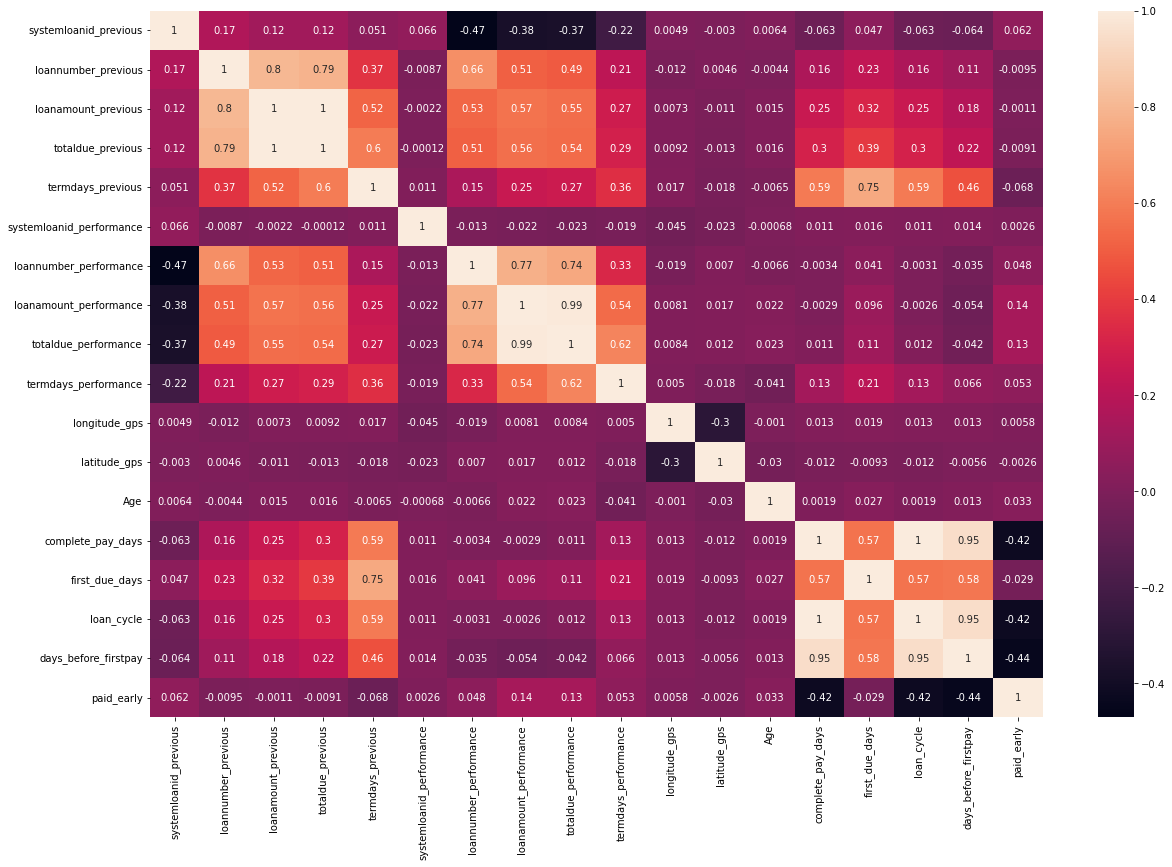

In [704]:

plt.figure(figsize=[20,13])
sns.heatmap(df.corr(),annot=True)

In [705]:
data.dropna(inplace=True)

<AxesSubplot:>

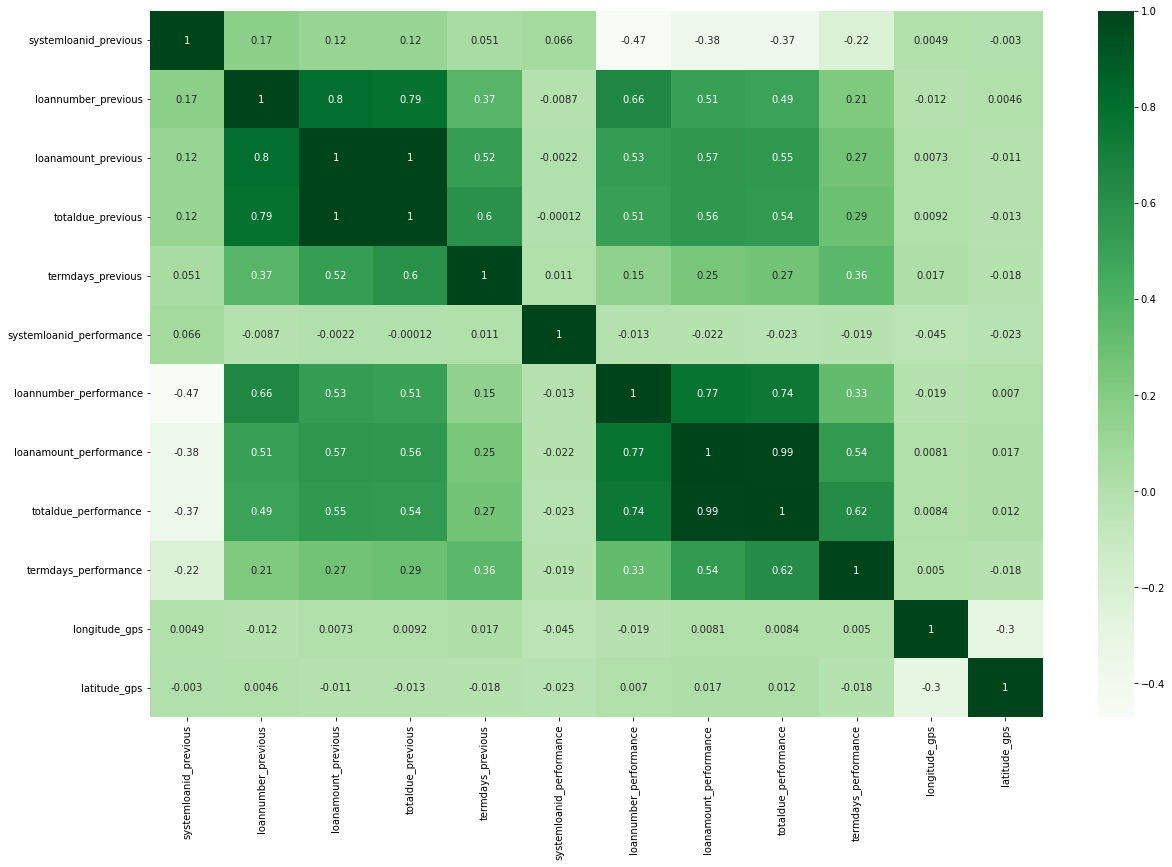

In [706]:
plt.figure(figsize=[20,13])
sns.heatmap(data.corr(),annot=True, cmap="Greens")

#### dropping unwanted features 

In [707]:
drop_col=['approveddate_previous',
 'creationdate_previous',
      'closeddate',
 'firstduedate',
 'firstrepaiddate',
     'systemloanid_previous',
     'systemloanid_performance',
     'creationdate_performance',
     'approveddate_performance',
     'birthdate',
    'customerid'
    ]

In [708]:
df.drop(drop_col,axis=1,inplace=True)

/var/folders/lt/lr7tn3dj3jb6ltvh3_h48b8c0000gn/T/ipykernel_35553/263615216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(drop_col,axis=1,inplace=True)


In [709]:
df

,loannumber_previous,loanamount_previous,totaldue_previous,termdays_previous,loannumber_performance,loanamount_performance,totaldue_performance,termdays_performance,good_bad_flag,bank_account_type,...,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,complete_pay_days,first_due_days,loan_cycle,days_before_firstpay,paid_early
0,2,10000.0,13000.0,30,12,30000.0,34500.0,30,Good,Other,...,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0,16,29,16,16,1
1,9,10000.0,13000.0,30,12,30000.0,34500.0,30,Good,Other,...,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0,29,31,29,27,1
2,8,20000.0,23800.0,30,12,30000.0,34500.0,30,Good,Other,...,6.433055,Diamond Bank,Permanent,Post-Graduate,51.0,52,29,52,52,0
3,5,10000.0,11500.0,15,7,20000.0,22250.0,15,Good,Other,...,10.292041,EcoBank,Permanent,Graduate,38.3,14,14,14,14,1
4,2,10000.0,11500.0,15,3,10000.0,11500.0,15,Good,Savings,...,7.491708,First Bank,Permanent,Graduate,45.2,27,15,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,6,30000.0,36800.0,60,7,30000.0,34500.0,30,Good,Other,...,9.138204,GT Bank,Permanent,Graduate,48.6,52,31,52,33,0
18178,2,10000.0,13000.0,30,14,30000.0,33000.0,30,Bad,Savings,...,6.548313,Zenith Bank,Permanent,Graduate,35.5,27,29,27,27,1
18179,9,30000.0,34400.0,30,14,30000.0,33000.0,30,Bad,Savings,...,6.548313,Zenith Bank,Permanent,Graduate,35.5,25,30,25,25,1
18180,4,10000.0,13000.0,30,14,30000.0,33000.0,30,Bad,Savings,...,6.548313,Zenith Bank,Permanent,Graduate,35.5,27,29,27,26,1


In [710]:
df.describe()

,loannumber_previous,loanamount_previous,totaldue_previous,termdays_previous,loannumber_performance,loanamount_performance,totaldue_performance,termdays_performance,longitude_gps,latitude_gps,Age,complete_pay_days,first_due_days,loan_cycle,days_before_firstpay,paid_early
count,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000,13673.000000
mean,4.202296,16570.101660,19650.595100,26.745045,8.404154,25688.949024,29810.966306,33.219849,4.478997,7.290004,38.355079,23.447451,24.585680,23.508447,22.649089,0.758429
std,3.270281,9377.817726,10513.351788,10.993020,4.319122,12623.903472,13769.244851,14.433599,8.645320,3.437288,6.134527,13.266506,7.166905,13.268013,12.146512,0.428051
min,1.000000,3000.000000,3900.000000,15.000000,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818,26.800000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,2.000000,10000.000000,11500.000000,15.000000,5.000000,10000.000000,13000.000000,30.000000,3.354724,6.471885,34.000000,14.000000,15.000000,14.000000,14.000000,1.000000
50%,3.000000,10000.000000,13000.000000,30.000000,8.000000,30000.000000,33000.000000,30.000000,3.573519,6.617599,37.600000,25.000000,29.000000,25.000000,25.000000,1.000000
75%,6.000000,20000.000000,24500.000000,30.000000,11.000000,40000.000000,44000.000000,30.000000,6.355602,7.421333,42.000000,29.000000,30.000000,29.000000,29.000000,1.000000
max,26.000000,60000.000000,68100.000000,90.000000,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069,61.200000,380.000000,34.000000,380.000000,380.000000,1.000000


we can see that there are outliers but these are true ouliers and so well just move on

we are going to build two models. one with data point of the aggregrate and another with the just the transformed

### Encoding categorical features with one hot encoder

In [716]:
categorical=[var for var in df.columns if df[var].dtypes=='O']

In [712]:
categorical

['good_bad_flag',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients']

In [717]:
df=pd.get_dummies(df,columns=['bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients'],prefix='_')

In [719]:
df.columns

Index(['loannumber_previous', 'loanamount_previous', 'totaldue_previous',
       'termdays_previous', 'loannumber_performance', 'loanamount_performance',
       'totaldue_performance', 'termdays_performance', 'good_bad_flag',
       'longitude_gps', 'latitude_gps', 'Age', 'complete_pay_days',
       'first_due_days', 'loan_cycle', 'days_before_firstpay', 'paid_early',
       '__Current', '__Other', '__Savings', '__Access Bank', '__Diamond Bank',
       '__EcoBank', '__FCMB', '__Fidelity Bank', '__First Bank', '__GT Bank',
       '__Heritage Bank', '__Keystone Bank', '__Skye Bank', '__Stanbic IBTC',
       '__Standard Chartered', '__Sterling Bank', '__UBA', '__Union Bank',
       '__Unity Bank', '__Wema Bank', '__Zenith Bank', '__Contract',
       '__Permanent', '__Retired', '__Self-Employed', '__Student',
       '__Unemployed', '__Graduate', '__Post-Graduate', '__Primary',
       '__Secondary'],
      dtype='object')

In [775]:
target=df.good_bad_flag
feature=df.drop(columns=['good_bad_flag'])

In [776]:
feature

,loannumber_previous,loanamount_previous,totaldue_previous,termdays_previous,loannumber_performance,loanamount_performance,totaldue_performance,termdays_performance,longitude_gps,latitude_gps,...,__Contract,__Permanent,__Retired,__Self-Employed,__Student,__Unemployed,__Graduate,__Post-Graduate,__Primary,__Secondary
0,2,10000.0,13000.0,30,12,30000.0,34500.0,30,3.432010,6.433055,...,0,1,0,0,0,0,0,1,0,0
1,9,10000.0,13000.0,30,12,30000.0,34500.0,30,3.432010,6.433055,...,0,1,0,0,0,0,0,1,0,0
2,8,20000.0,23800.0,30,12,30000.0,34500.0,30,3.432010,6.433055,...,0,1,0,0,0,0,0,1,0,0
3,5,10000.0,11500.0,15,7,20000.0,22250.0,15,11.139350,10.292041,...,0,1,0,0,0,0,1,0,0,0
4,2,10000.0,11500.0,15,3,10000.0,11500.0,15,3.985770,7.491708,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,6,30000.0,36800.0,60,7,30000.0,34500.0,30,7.381877,9.138204,...,0,1,0,0,0,0,1,0,0,0
18178,2,10000.0,13000.0,30,14,30000.0,33000.0,30,3.378536,6.548313,...,0,1,0,0,0,0,1,0,0,0
18179,9,30000.0,34400.0,30,14,30000.0,33000.0,30,3.378536,6.548313,...,0,1,0,0,0,0,1,0,0,0
18180,4,10000.0,13000.0,30,14,30000.0,33000.0,30,3.378536,6.548313,...,0,1,0,0,0,0,1,0,0,0


### Model building

we would like to select useful features using the RFE and RFECV. we will first use RFECV to get the optimal number of features

In [777]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [778]:
model=LogisticRegression()

In [779]:
rfecv=RFECV(estimator=LogisticRegression(),step=1,cv=10,scoring='accuracy')

In [780]:
rfecv.fit(feature,target)

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [781]:
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 11


plotting it

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


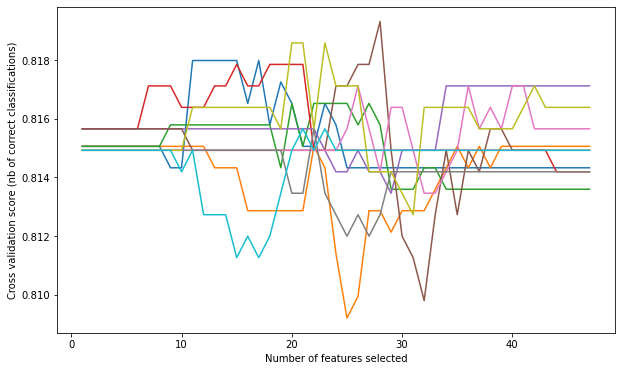

In [782]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [783]:
print('Selected features: %s',list(feature.columns[rfecv.support_]) )

Selected features: %s ['paid_early', '__Current', '__Savings', '__Diamond Bank', '__EcoBank', '__Skye Bank', '__Stanbic IBTC', '__Wema Bank', '__Graduate', '__Post-Graduate', '__Secondary']


In [788]:
rfe=RFE(model, n_features_to_select=16)
rfe=rfe.fit(feature,target)
print('Selected features: %s' % list(feature.columns[rfe.support_]))

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Selected features: ['paid_early', '__Current', '__Other', '__Savings', '__Diamond Bank', '__EcoBank', '__Skye Bank', '__Stanbic IBTC', '__UBA', '__Wema Bank', '__Zenith Bank', '__Permanent', '__Student', '__Graduate', '__Post-Graduate', '__Secondary']


lets use these selected values first to see the performance

In [791]:
sel=feature.columns[rfe.support_]

In [792]:
sel

Index(['paid_early', '__Current', '__Other', '__Savings', '__Diamond Bank',
       '__EcoBank', '__Skye Bank', '__Stanbic IBTC', '__UBA', '__Wema Bank',
       '__Zenith Bank', '__Permanent', '__Student', '__Graduate',
       '__Post-Graduate', '__Secondary'],
      dtype='object')

In [908]:
X=feature
y=target

<AxesSubplot:>

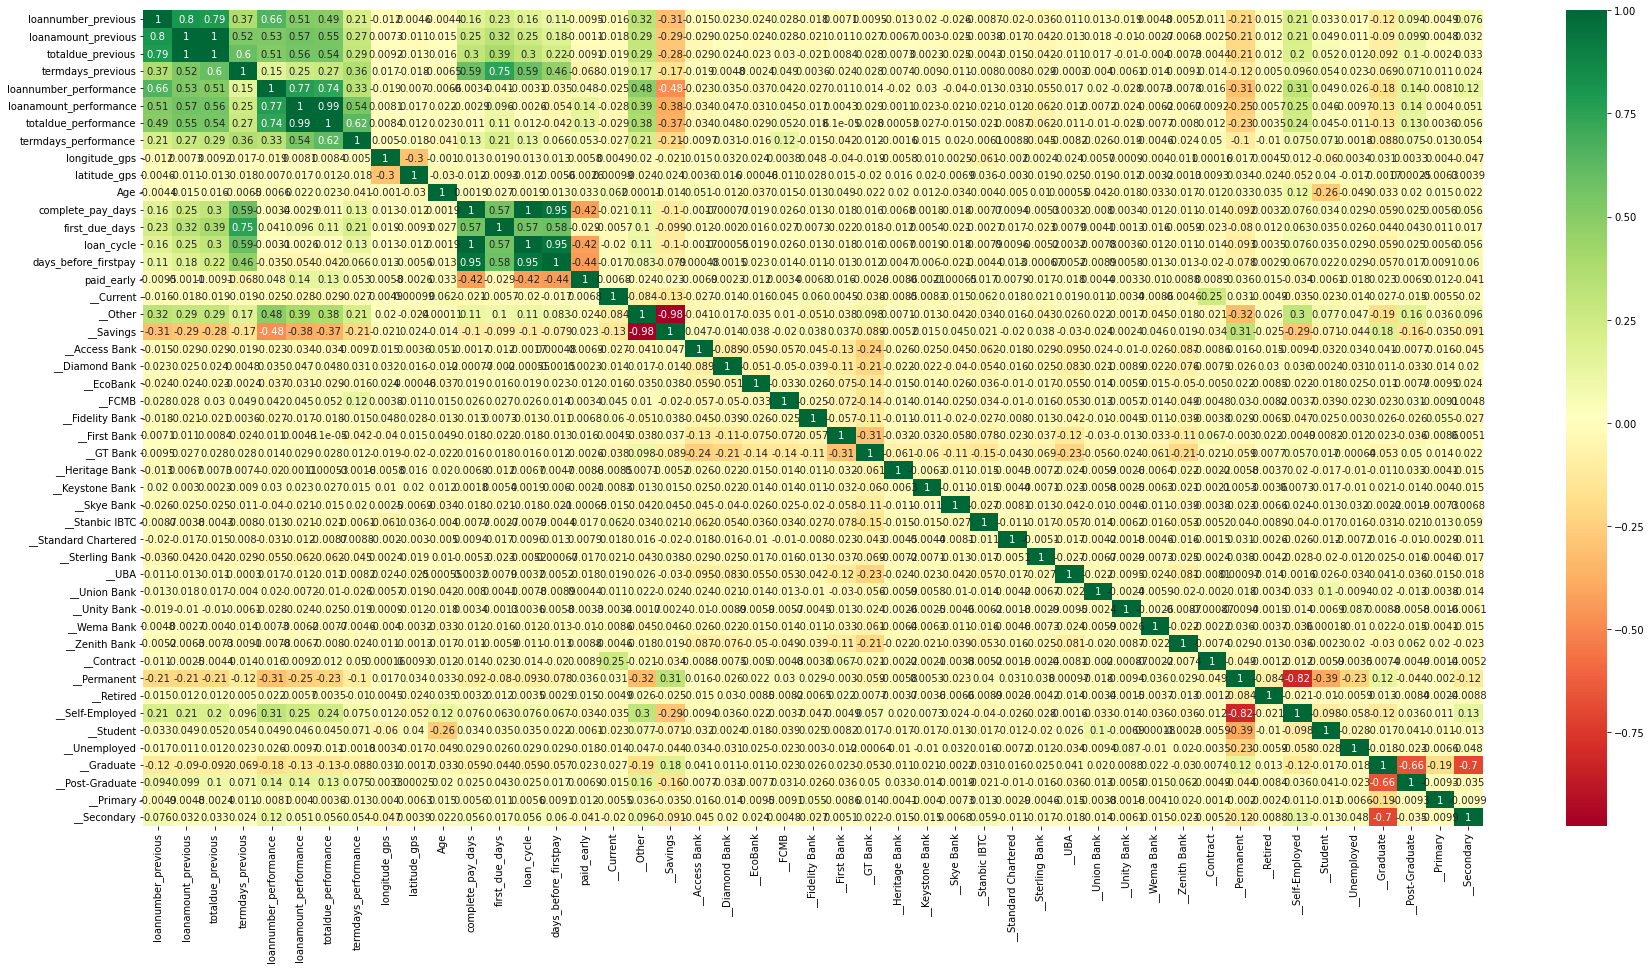

In [909]:
plt.subplots(figsize=(30, 15))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")

### Using test train split

In [910]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [911]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [912]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_train=logreg.predict(X_train)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" accuracy train is %2.3f" % accuracy_score(y_train, y_pred_train))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))

Train/Test split results:
LogisticRegression accuracy is 0.804
LogisticRegression accuracy train is 0.818
LogisticRegression log_loss is 0.485


### using k-fold cross validation and cross val score

In [914]:
logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

K-fold cross-validation results:
LogisticRegression average accuracy is 0.815
LogisticRegression average log_loss is 0.465
LogisticRegression average auc is 0.620


### using k-fold cross-validation and cross validation

In [801]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

K-fold cross-validation results:
LogisticRegression average accuracy: 0.815 (+/-0.001)
LogisticRegression average log_loss: 0.458 (+/-0.005)
LogisticRegression average auc: 0.639 (+/-0.015)


In [915]:
y_test.value_counts()

Good    2202
Bad      533
Name: good_bad_flag, dtype: int64

Confusion matrix

 [[   2  531]
 [   4 2198]]

True Positives(TP) =  2

True Negatives(TN) =  2198

False Positives(FP) =  531

False Negatives(FN) =  4


<AxesSubplot:>

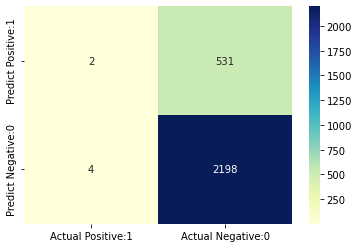

In [916]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [918]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.33      0.00      0.01       533
        Good       0.81      1.00      0.89      2202

    accuracy                           0.80      2735
   macro avg       0.57      0.50      0.45      2735
weighted avg       0.71      0.80      0.72      2735



this is an unbalanced class so lets try to balance it

In [924]:
X = df.drop(['good_bad_flag'], axis=1)
y = df['good_bad_flag']

In [925]:
from imblearn.over_sampling import SMOTE

In [926]:
smote_algo = SMOTE(sampling_strategy='all',random_state=0)
smote_data_X, smote_data_Y = smote_algo.fit_resample(X,y)
smote_data_X = pd.DataFrame(data=smote_data_X, columns=X.columns)
smote_data_Y = pd.DataFrame(data=smote_data_Y, columns=['good_bad_flag'])

In [927]:
smote_data = smote_data_X
smote_data['good_bad_flag'] = smote_data_Y['good_bad_flag']

In [928]:
smote_data.drop_duplicates(keep="first", inplace=True) #removing duplicate data if any
smote_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21879 entries, 0 to 22291
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loannumber_previous     21879 non-null  int64  
 1   loanamount_previous     21879 non-null  float64
 2   totaldue_previous       21879 non-null  float64
 3   termdays_previous       21879 non-null  int64  
 4   loannumber_performance  21879 non-null  int64  
 5   loanamount_performance  21879 non-null  float64
 6   totaldue_performance    21879 non-null  float64
 7   termdays_performance    21879 non-null  int64  
 8   longitude_gps           21879 non-null  float64
 9   latitude_gps            21879 non-null  float64
 10  Age                     21879 non-null  float64
 11  complete_pay_days       21879 non-null  int64  
 12  first_due_days          21879 non-null  int64  
 13  loan_cycle              21879 non-null  int64  
 14  days_before_firstpay    21879 non-null

In [929]:
X = smote_data.drop(['good_bad_flag'],axis=1)
y = smote_data['good_bad_flag']

In [930]:
col=X.columns


In [931]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [932]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [933]:
X_train=pd.DataFrame(X_train,columns=[col])

In [934]:
X_test=pd.DataFrame(X_test,columns=[col])

In [935]:
df_train=X_train
df_test=X_test


In [936]:
logreg = LogisticRegression(solver='liblinear', random_state=2)
logreg.fit(df_train, y_train)
y_pred_test = logreg.predict(df_test)
y_pred_test

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array(['Bad', 'Good', 'Bad', ..., 'Good', 'Bad', 'Good'], dtype=object)

In [937]:
print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))
y_pred_train = logreg.predict(df_train)

print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

Model accuracy score(test):  0.8203839122486288
Model accuracy score(train):  0.8180883277152489


/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [938]:
y_test.value_counts()
null_accuracy = 2194/(len(y_test))
null_accuracy

0.5013711151736746

In [939]:
y_test.value_counts()

Bad     2194
Good    2182
Name: good_bad_flag, dtype: int64

Confusion matrix

 [[1506  688]
 [  98 2084]]

True Positives(TP) =  1506

True Negatives(TN) =  2084

False Positives(FP) =  688

False Negatives(FN) =  98


<AxesSubplot:>

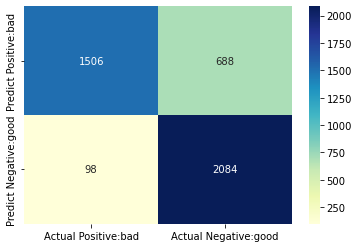

In [949]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:bad', 'Actual Negative:good'], 
                                 index=['Predict Positive:bad', 'Predict Negative:good'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [950]:
y_pred1 = logreg.predict_proba(df_test)[:,1]
y_pred0 = logreg.predict_proba(df_test)[:,0]

/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/ujunwafatima/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [942]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         Bad       0.94      0.69      0.79      2194
        Good       0.75      0.96      0.84      2182

    accuracy                           0.82      4376
   macro avg       0.85      0.82      0.82      4376
weighted avg       0.85      0.82      0.82      4376



In [943]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

0.8836245756487778


In [944]:
numerical=[var for var in data.columns if data[var].dtypes!='O']
categorical=[var for var in data.columns if data[var].dtypes=='O']

In [945]:
numerical

['systemloanid_previous',
 'loannumber_previous',
 'loanamount_previous',
 'totaldue_previous',
 'termdays_previous',
 'systemloanid_performance',
 'loannumber_performance',
 'loanamount_performance',
 'totaldue_performance',
 'termdays_performance',
 'longitude_gps',
 'latitude_gps']

In [946]:
column= ['bank_account_type',
 'bank_name_clients',
 'employment_status_clients']

convert categorical variables to dummies

In [ ]:
data=pd.get_dummies(data,columns=column,prefix='_')

In [ ]:
data

In [ ]:
data=pd.get_dummies(data,columns=['level_of_education_clients'],prefix='_')

In [22]:
data

NameError: name 'data' is not defined

In [ ]:
data.dropna()

### Engineering outliers in numerical variable

In [ ]:
def max_value(data, variable, top):
    return np.where(data[variable]>top, top, data[variable])

In [ ]:
def findOutliers(x):
    IQR = data[x].quantile(0.75) - data[x].quantile(0.25)
    Lower_fence = data[x].quantile(0.25) - (IQR * 3)
    Upper_fence = data[x].quantile(0.75) + (IQR * 3)
    data[x]=max_value(data,x,Upper_fence)
  
 
    print(x,'outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


In [ ]:
for col in numerical:
    findOutliers(col)

In [ ]:
data[numerical].describe()

In [ ]:
data=pd.get_dummies(data,columns=['bank_account_type','bank_name_clients','employment_status_clients'])

In [ ]:
# data.good_bad_flag.replace("Good",1,inplace=True)
# data.good_bad_flag.replace("Bad",0,inplace=True)
# data

## Feature Scaling

NameError: name 'data' is not defined

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
smote_algo = SMOTE(sampling_strategy='all',random_state=0)
smote_data_X, smote_data_Y = smote_algo.fit_resample(new_feature,target)
smote_data_X = pd.DataFrame(data=smote_data_X, columns=new_feature.columns)
smote_data_Y = pd.DataFrame(data=smote_data_Y, columns=['FraudResult'])

smote_data = smote_data_X
smote_data['FraudResult'] = smote_data_Y['FraudResult']
smote_data.drop_duplicates(keep="first", inplace=True) #removing duplicate data if any
smote_data.info()
X = smote_data.drop(['FraudResult'],axis=1)
y = smote_data['FraudResult']

NameError: name 'new_feature' is not defined

In [20]:
cols=X.columns

NameError: name 'X' is not defined

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train=pd.DataFrame(X_train,columns=[cols])

In [ ]:
X_train

In [ ]:
y.value_counts()

this is an imbalanced data

### Model training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(solver='liblinear',random_state=0)

In [ ]:
logreg.fit(X_train,y_train)

In [ ]:
# predict result

y_pred_test=logreg.predict(X_test)

In [ ]:
y_pred_test

In [ ]:
logreg.predict_proba(X_test)[:,0]

### check accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

print('the accuracy of the mode is {0:0.4f}'.format(accuracy_score(y_test,y_pred_test)))


### Checking for overfitting

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train


In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

### checking for overfitting or underfitting

In [ ]:


print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

### increasing the complexity of themodel

In [ ]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

In [ ]:
## test and train score

In [ ]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

### Null accuracy

In [ ]:
y_test.value_counts()

In [ ]:
null_acurracy = 2260/(len(y_test))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

### confusion matrics

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_test))


In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

In [ ]:
## roc curve

from sklearn.metrics import roc_curve


In [ ]:
fpr,tpr,thresholds= roc_curve(y_test,y_pred1,pos_label='Good')
plt.figure(figsize=[18,4])
plt.plot(fpr,tpr,linewidth=1)


In [ ]:
y_pred1=logreg.predict_proba(X_test)[:,1]
y_pred1=y_pred1.reshape(-1,1)

In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC=roc_auc_score(y_test,y_pred1)
ROC_AUC

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_validated=cross_val_score(logreg, X_train, y_train, scoring='roc_auc').mean()

In [ ]:
cross_validated

In [ ]:
### for accuracy
from sklearn.model_selection import cross_val_score

cross_val_accuracy=cross_val_score(logreg, X_train,y_train,cv=5, scoring='accuracy')
cross_val_accuracy.mean()

In [ ]:
temp=temp.merge(data_pref.reset_index(), how='left',on=['customerid'],suffixes=['_old','_new'])

In [ ]:
temp

In [ ]:
temp.isnull().sum()/temp.shape[0]*100

In [ ]:
## getting categorical variables
categorical=[var for var in temp.columns if temp[var].dtype=='O']

In [ ]:
categorical

In [ ]:
temp[categorical].isnull().sum()/temp.shape[0]*100

In [ ]:
temp[categorical].isnull().mean()

In [ ]:
drop_cat=[var for var in categorical if  temp[var].isnull().sum()/temp.shape[0]*100>50]


In [ ]:
drop_cat

In [ ]:
temp.drop(drop_cat,axis=1 ,inplace=True)

In [ ]:
columns=temp.columns
columns

In [ ]:
cate=[var for var in columns if temp[var].dtype=='O']

In [ ]:
new_cat=[var for var in cate if  temp[var].isnull().mean()>0.0]



In [ ]:
new_cat

In [ ]:
temp.head(300)

## Feature engineering

i assume the missing values are at completely at random MCAR so i will impute missing values with the mode for categorical variables. for numerical variables i will use either mean or median method

In [ ]:

    for col in new_cat:
        col_median=temp[col].mode()[0]
        temp[col].fillna(col_median,inplace=True)
        
        

In [ ]:
temp[new_cat].isnull().sum()

In [ ]:
temp.describe()

In [ ]:
temp.columns

it looks like a couple of the features contain outliers so i will check them out

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(3,2,1)
fig=temp.boxplot(column='index_new')
fig.set_title('')
fig.set_ylabel('index_new')

plt.subplot(3,2,2)
fig=temp.boxplot(column='latitude_gps')
fig.set_title('')
fig.set_ylabel('latitude_gps')

plt.subplot(3,2,3)
fig=temp.boxplot(column='loannumber_old')
fig.set_title('')
fig.set_ylabel('loannumber_old')

plt.subplot(3,2,4)
fig=temp.boxplot(column='loanamount_old')
fig.set_title('')
fig.set_ylabel('loanamount_old')

plt.subplot(3,2,5)
fig=temp.boxplot(column='totaldue_old')
fig.set_title('')
fig.set_ylabel('totaldue_old')

plt.subplot(3,2,6)
fig=temp.boxplot(column='termdays_old')
fig.set_title('')
fig.set_ylabel('termdays_old')

In [ ]:
plt.figure(figsize=[20,10])



plt.subplot(3,2,3)
fig=temp.boxplot(column='loannumber_new')
fig.set_title('')
fig.set_ylabel('loannumber_new')

plt.subplot(3,2,4)
fig=temp.boxplot(column='loanamount_new')
fig.set_title('')
fig.set_ylabel('loanamount_new')

plt.subplot(3,2,5)
fig=temp.boxplot(column='totaldue_new')
fig.set_title('')
fig.set_ylabel('totaldue_new')

plt.subplot(3,2,6)
fig=temp.boxplot(column='termdays_new')
fig.set_title('')
fig.set_ylabel('termdays_new')

since we have discovered outliers in our data we will use median impute instead of mean for the numerical data

In [ ]:
numerical=[var for var in temp.columns if temp[var].dtype!='O']

In [ ]:
numerical

In [ ]:
for col in numerical:
    col_median=temp[col].median()
    temp[col].fillna(col_median, inplace=True)

In [ ]:
temp[numerical].isnull().sum()

In [ ]:
temp

### Feature engineering date variables

In [ ]:
temp['birthdate']=pd.to_datetime(temp['birthdate'])

In [ ]:
temp['birth_year']=temp['birthdate'].dt.year
temp['birth_month']=temp['birthdate'].dt.month
temp['birth_day']=temp['birthdate'].dt.day

In [ ]:
temp.drop(['birthdate'],axis=1,inplace=True)

In [ ]:
## firstrepaiddate

temp['firstrepaiddate']=pd.to_datetime(temp['firstrepaiddate'])

In [ ]:


temp['firstrepaid_year']=temp['firstrepaiddate'].dt.year
temp['firstrepaid_month']=temp['firstrepaiddate'].dt.month
temp['firstrepaid_day']=temp['firstrepaiddate'].dt.day

In [ ]:
temp.drop(['firstrepaiddate'],axis=1,inplace=True)

In [ ]:
#creation date

temp['approveddate_new']=pd.to_datetime(temp['approveddate_new'])

In [ ]:


temp['approveddate_old']=pd.to_datetime(temp['approveddate_old'])
temp.creationdate_old=pd.to_datetime(temp['creationdate_old'])
temp.creationdate_new=pd.to_datetime(temp['creationdate_new'])
temp.app=pd.to_datetime(temp['creationdate_old'])
temp.firstduedate=pd.to_datetime(temp['firstduedate'])
temp.closeddate=pd.to_datetime(temp['closeddate'])

In [ ]:
# temp.drop(['creationdate_new'],axis=1,inplace=True)
# temp['approveddate_new']=temp['approveddate_new'].dt.month


## Exploratory data analysis

In [ ]:
temp.columns

In [ ]:
##bank account type

temp['bank_account_type'].unique()

In [ ]:
temp.good_bad_flag.replace('Good',1,inplace=True)

In [ ]:
temp.good_bad_flag.replace('Bad',0,inplace=True)

In [ ]:
temp.good_bad_flag.value_counts()

In [ ]:
cate

In [ ]:
sns.barplot('bank_account_type','good_bad_flag',color="mediumturquoise",data=temp)

we can see that those with current account had less loan default than the rest. this makes sense because those with current account in nigeria are salary earners

In [ ]:
temp.bank_account_type.value_counts()

we can see that those with saving borrowed more. this makes sense because they arent exactly salary earners

In [ ]:
## employment_status_clients
plt.figure(figsize=[10,8])

sns.barplot('employment_status_clients','good_bad_flag',color='red',data=temp)

students were the highest loan defaulters, while ritired and contract the lowest

In [ ]:
temp.employment_status_clients.value_counts()

suprisingly permanent workers borrowed the most money

In [ ]:
## bank_name_clients

In [ ]:
plt.figure(figsize=[30,8])
sns.barplot('bank_name_clients','good_bad_flag',color='black',data=temp)

In [ ]:
categorical=[var for var in temp.columns if temp[var].dtypes=='O']

In [ ]:
categorical

In [ ]:
temp

In [ ]:
numerical=[var for var in temp.columns if temp[var].dtypes!='O']

In [ ]:
numerical

In [ ]:
data=pd.get_dummies(temp,columns=['bank_account_type','bank_name_clients','employment_status_clients'])

In [ ]:
data.tail()

In [ ]:
data.bank_account_type_Current.loc[data.bank_account_type_Current==1]

In [ ]:
data

In [ ]:
new_data=data.copy()

In [ ]:
new_data

In [ ]:
new_data.dropna()

In [ ]:
level.dropna()

In [ ]:
level.isnull().sum()

In [ ]:
new_data['level']=level

In [ ]:
new_data

In [ ]:
new_data.level.isnull().sum()

In [ ]:
new_data.level.fillna(new_data.level.mode()[0],inplace=True)

In [ ]:
new_data

In [ ]:
sns.heatmap(new_data.corr(),annot=True)

In [ ]:
df=data.copy()

In [ ]:
level

In [ ]:
df['level']=level

In [ ]:
df.good_bad_flag.replace("Good",1,)
df.good_bad_flag.replace("Bad",0)

In [ ]:
df

In [ ]:
plt.figure(figsize=[20,15])

sns.heatmap(df.corr(),annot=True)

In [ ]:
d=pd.read_csv(path_trainperf)

In [ ]:
d.good_bad_flag.isnull().sum()